# 线性模型

# 穷举法

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 准备数据
x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

In [13]:
# 向前传播
def forward(x):
    return x * w

In [14]:
# 损失函数
def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y)*(y_pred - y)

In [15]:
w_list = []
mse_list = []

In [16]:
# 训练
for w in np.arange(0.0,4.1,0.1):
    print('w=',w)
    l_sum = 0
    for x_val,y_val in zip(x_data,y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val,y_val)
        l_sum += loss_val
        print('\t',x_val,y_val,y_pred_val,loss_val)
    print('MSE=',l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

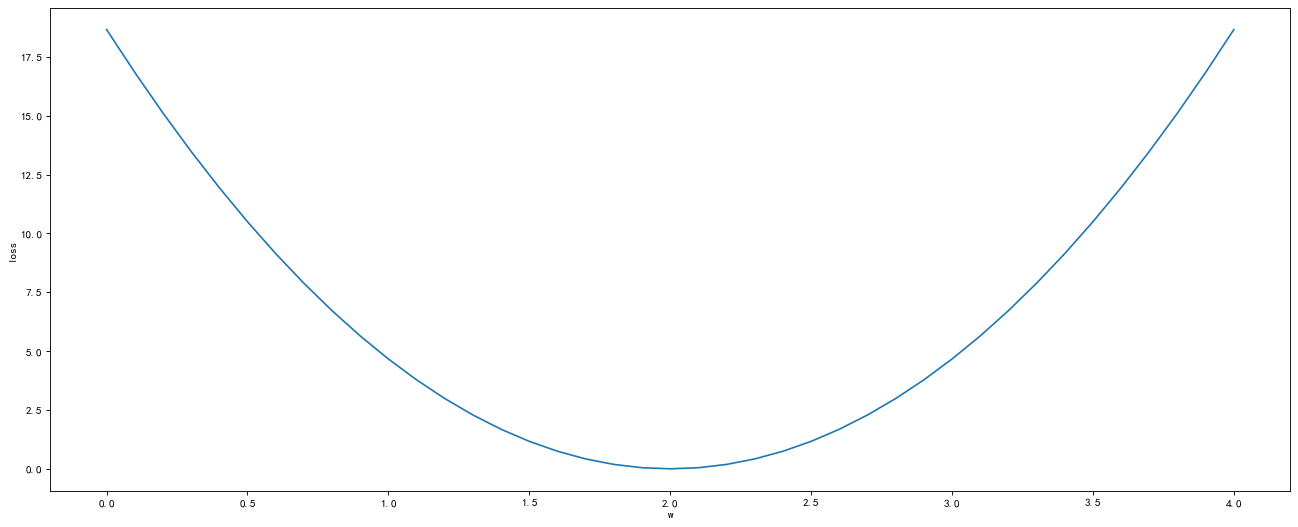

In [17]:
plt.figure(figsize=(20,8),dpi=80)
plt.plot(w_list,mse_list)
plt.ylabel('loss')
plt.xlabel('w')
plt.show()

# 第二讲作业--3维

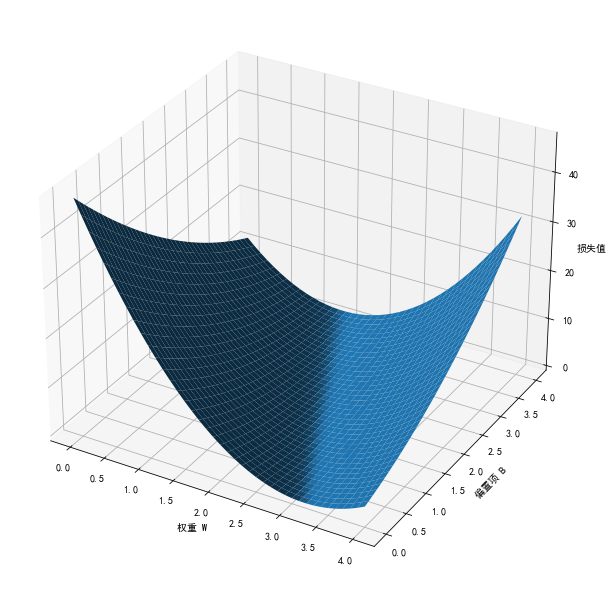

In [23]:
from mpl_toolkits.mplot3d import Axes3D

#这里设函数为y=3x+0.4
x_data = [1.0,2.0,3.0]
y_data = [3.4,6.4,9.4]

def forward(x):
    return x * w + b

def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y)*(y_pred-y)

W=np.arange(0.0,4.1,0.1)
B=np.arange(0.0,4.1,0.1)
[w,b]=np.meshgrid(W,B)

l_sum = 0
for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
#     print(y_pred_val)
    loss_val = loss(x_val, y_val)  #为什么变成了一个二维数组
    l_sum += loss_val              #为什么变成了一个二维数组
fig = plt.figure(figsize=(20,8))
ax = Axes3D(fig)                   #Axes3D是mpl_toolkits.mplot3d中的一个绘图函数
ax.plot_surface(w, b, l_sum/3)     #画曲面图---Axes3D.plot_surface(X, Y, Z)
ax.set_xlabel("权重 W")
ax.set_ylabel("偏置项 B")
ax.set_zlabel("损失值")
plt.show()

# 梯度下降算法

In [25]:
# 准备数据
x_data =[1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]
w = 1.0

In [26]:
# 前馈
def forward(x):
    return x * w

In [27]:
def cost(xs,ys):
    cost = 0
    for x,y in zip(xs,ys):
        y_pred = forward(x)
        cost += (y_pred-y)**2
    return cost/len(xs)
def gradient(xs,ys):
    grad = 0
    for x,y in zip(xs,ys):
        grad +=2*x*(x*w-y)
    return grad/len(xs)

In [28]:
epoch_list = []
w_list = []
loss_list = []
for epoch in range(100):
    epoch_list.append(epoch)
    cost_val = cost(x_data,y_data)
    grad_val = gradient(x_data,y_data)
    w -= 0.01 *grad_val
    w_list.append(w)
    loss_list.append(cost_val)
    print('Epoch:',epoch,'w=',w,'loss=',cost_val)
print('Predict (after training)',4,forward(4))

Epoch: 0 w= 1.0933333333333333 loss= 4.666666666666667
Epoch: 1 w= 1.1779555555555554 loss= 3.8362074074074086
Epoch: 2 w= 1.2546797037037036 loss= 3.1535329869958857
Epoch: 3 w= 1.3242429313580246 loss= 2.592344272332262
Epoch: 4 w= 1.3873135910979424 loss= 2.1310222071581117
Epoch: 5 w= 1.4444976559288012 loss= 1.7517949663820642
Epoch: 6 w= 1.4963445413754464 loss= 1.440053319920117
Epoch: 7 w= 1.5433523841804047 loss= 1.1837878313441108
Epoch: 8 w= 1.5859728283235668 loss= 0.9731262101573632
Epoch: 9 w= 1.6246153643467005 loss= 0.7999529948031382
Epoch: 10 w= 1.659651263674342 loss= 0.6575969151946154
Epoch: 11 w= 1.6914171457314033 loss= 0.5405738908195378
Epoch: 12 w= 1.7202182121298057 loss= 0.44437576375991855
Epoch: 13 w= 1.7463311789976905 loss= 0.365296627844598
Epoch: 14 w= 1.7700069356245727 loss= 0.3002900634939416
Epoch: 15 w= 1.7914729549662791 loss= 0.2468517784170642
Epoch: 16 w= 1.8109354791694263 loss= 0.2029231330489788
Epoch: 17 w= 1.8285815011136133 loss= 0.16681

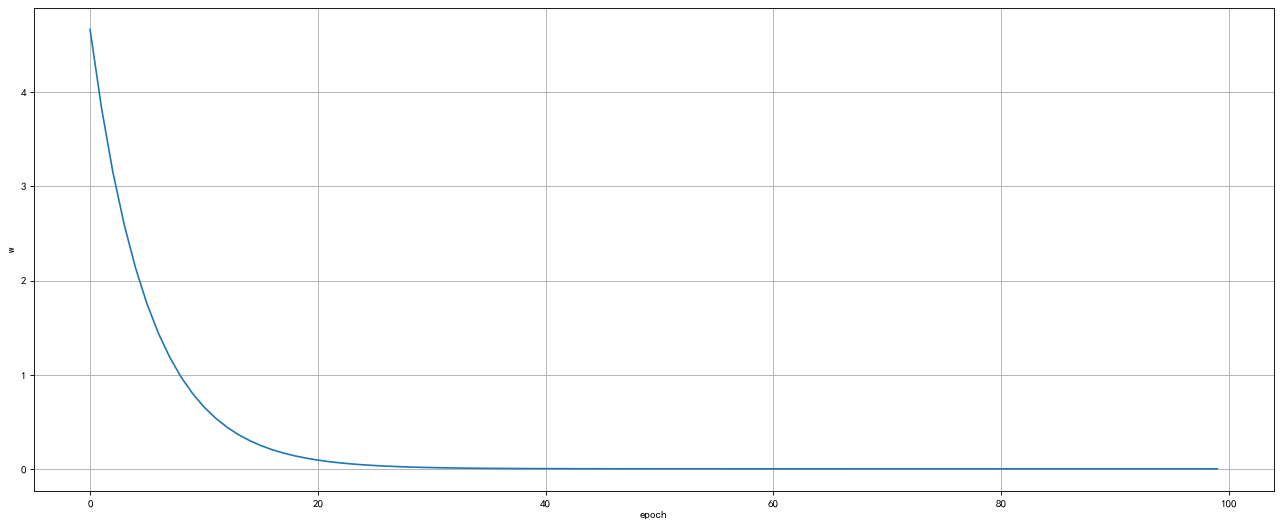

In [32]:
plt.figure(figsize=(20,8),dpi=80)
plt.plot(epoch_list,loss_list)
plt.xlabel('epoch')
plt.ylabel('w')
plt.grid()
plt.show()

# 随机梯度下降

In [35]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
 
w = 1.0
 
def forward(x):
    return x * w
 
def loss(x, y):
    y_prey = forward(x)
    return (y_prey - y) ** 2
 
def gradient(x, y):
    return 2 * x * (x * w - y)
 
print('Predict (before training)', 4, forward(4))
loss_list = []
epoch_list = []
for epoch in range(100):
    for x, y in zip(x_data, y_data):
        grad = gradient(x, y)
        w = w - 0.01 * grad
        print('\tgrad: ', x, y, grad)
        l = loss(x, y)
    print('progress:', epoch, 'w= %.2f'% w, 'loss= %.2f'% l)
    epoch_list.append(epoch)
    loss_list.append(l)
 
print('Predict (after training)', 4, '{:.2f}'.format(forward(4)))


Predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.2288
progress: 0 w= 1.26 loss= 4.92
	grad:  1.0 2.0 -1.478624
	grad:  2.0 4.0 -5.796206079999999
	grad:  3.0 6.0 -11.998146585599997
progress: 1 w= 1.45 loss= 2.69
	grad:  1.0 2.0 -1.093164466688
	grad:  2.0 4.0 -4.285204709416961
	grad:  3.0 6.0 -8.87037374849311
progress: 2 w= 1.60 loss= 1.47
	grad:  1.0 2.0 -0.8081896081960389
	grad:  2.0 4.0 -3.1681032641284723
	grad:  3.0 6.0 -6.557973756745939
progress: 3 w= 1.70 loss= 0.80
	grad:  1.0 2.0 -0.59750427561463
	grad:  2.0 4.0 -2.3422167604093502
	grad:  3.0 6.0 -4.848388694047353
progress: 4 w= 1.78 loss= 0.44
	grad:  1.0 2.0 -0.44174208101320334
	grad:  2.0 4.0 -1.7316289575717576
	grad:  3.0 6.0 -3.584471942173538
progress: 5 w= 1.84 loss= 0.24
	grad:  1.0 2.0 -0.3265852213980338
	grad:  2.0 4.0 -1.2802140678802925
	grad:  3.0 6.0 -2.650043120512205
progress: 6 w= 1.88 loss= 0.13
	grad:  1.0 2.0 -0.241448373202223
	grad:  2.0 4.0 -0.9464

progress: 89 w= 2.00 loss= 0.00
	grad:  1.0 2.0 -3.1294966618133913e-12
	grad:  2.0 4.0 -1.226752033289813e-11
	grad:  3.0 6.0 -2.539835008974478e-11
progress: 90 w= 2.00 loss= 0.00
	grad:  1.0 2.0 -2.3137047833188262e-12
	grad:  2.0 4.0 -9.070078021977679e-12
	grad:  3.0 6.0 -1.8779644506139448e-11
progress: 91 w= 2.00 loss= 0.00
	grad:  1.0 2.0 -1.7106316363424412e-12
	grad:  2.0 4.0 -6.7057470687359455e-12
	grad:  3.0 6.0 -1.3882228699912957e-11
progress: 92 w= 2.00 loss= 0.00
	grad:  1.0 2.0 -1.2647660696529783e-12
	grad:  2.0 4.0 -4.957811938766099e-12
	grad:  3.0 6.0 -1.0263789818054647e-11
progress: 93 w= 2.00 loss= 0.00
	grad:  1.0 2.0 -9.352518759442319e-13
	grad:  2.0 4.0 -3.666400516522117e-12
	grad:  3.0 6.0 -7.58859641791787e-12
progress: 94 w= 2.00 loss= 0.00
	grad:  1.0 2.0 -6.914468997365475e-13
	grad:  2.0 4.0 -2.7107205369247822e-12
	grad:  3.0 6.0 -5.611511255665391e-12
progress: 95 w= 2.00 loss= 0.00
	grad:  1.0 2.0 -5.111466805374221e-13
	grad:  2.0 4.0 -2.00373051

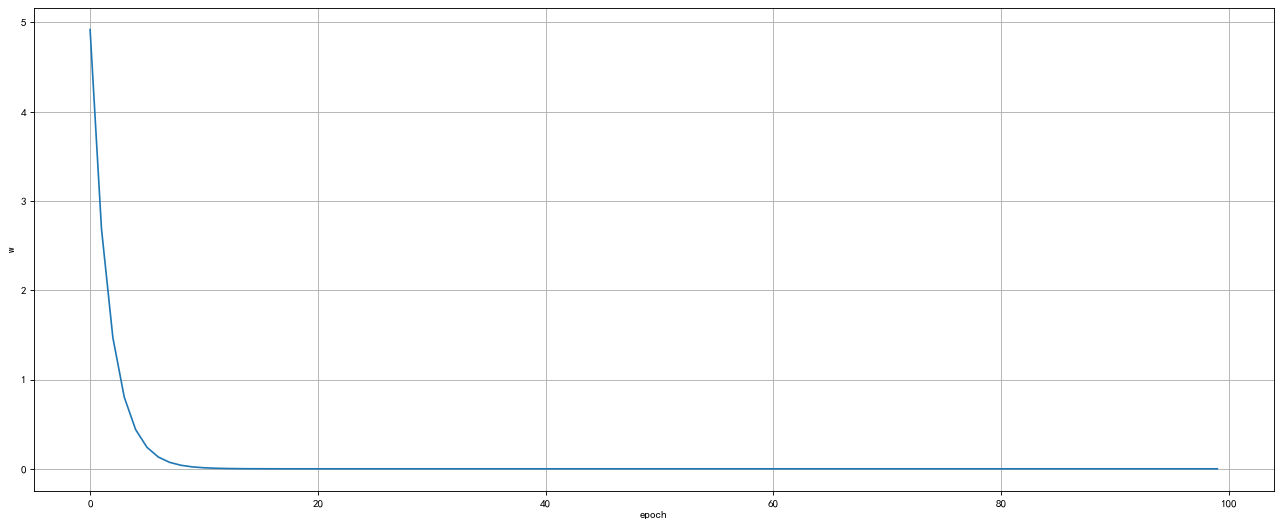

In [36]:
plt.figure(figsize=(20,8),dpi=80)
plt.plot(epoch_list,loss_list)
plt.xlabel('epoch')
plt.ylabel('w')
plt.grid()
plt.show()